In [3]:
pip install yfinance


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 1.6/1.6 MB 21.8 MB/s eta 0:00:00
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15617 sha256=cc61138442415d18182f7bf9f5b9aa7e3241b0d1bf2be0c037838a6066e6aff4
  Stored in directory: c:\users\91701\appdata\local\pip\cache\wheels\cc\bd\6f\664d62c99327abeef7d86489e6631cbf45b56fbf7ef1d6ef00
Successfully built multitasking


In [3]:
import yfinance as yf
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [5]:
ticker = "NVDA"
df = yf.download(ticker, start = "2015-01-01" , end = "2025-01-01")
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2015-01-02,0.483011,0.486611,0.475333,0.483011,113680000
2015-01-05,0.474853,0.484451,0.472694,0.483011,197952000
2015-01-06,0.460456,0.476053,0.459977,0.475573,197764000
2015-01-07,0.459257,0.467895,0.457817,0.463816,321808000
2015-01-08,0.476533,0.479412,0.464296,0.464536,283780000


In [27]:
df.shape

(2516, 5)

In [29]:
df.isnull().sum()

Price   Ticker
Close   NVDA      0
High    NVDA      0
Low     NVDA      0
Open    NVDA      0
Volume  NVDA      0
dtype: int64

In [9]:
print(df.columns)

MultiIndex([(    'Close', 'NVDA'),
            (     'High', 'NVDA'),
            (      'Low', 'NVDA'),
            (     'Open', 'NVDA'),
            (   'Volume', 'NVDA'),
            ('Next_Open',     '')],
           names=['Price', 'Ticker'])


In [11]:
if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.get_level_values(0)

df = df.dropna()

In [13]:
df.head()

Price,Close,High,Low,Open,Volume,Next_Open
Date,,,,,,
2015-01-02,0.483011,0.486611,0.475333,0.483011,113680000,0.483011
2015-01-05,0.474853,0.484451,0.472694,0.483011,197952000,0.475573
2015-01-06,0.460456,0.476053,0.459977,0.475573,197764000,0.463816
2015-01-07,0.459257,0.467895,0.457817,0.463816,321808000,0.464536
2015-01-08,0.476533,0.479412,0.464296,0.464536,283780000,0.478212


In [15]:
print(df.columns)

Index(['Close', 'High', 'Low', 'Open', 'Volume', 'Next_Open'], dtype='object', name='Price')


In [17]:
df["Next_Open"] = df["Open"].shift(-1)
df["Target"] = (df["Next_Open"] > df["Close"]).astype(int)
df = df.dropna()

C:\Users\91701\AppData\Local\Temp\ipykernel_5968\4032143514.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Next_Open"] = df["Open"].shift(-1)
C:\Users\91701\AppData\Local\Temp\ipykernel_5968\4032143514.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Target"] = (df["Next_Open"] > df["Close"]).astype(int)


In [19]:
df.head()

Price,Close,High,Low,Open,Volume,Next_Open,Target
Date,,,,,,,
2015-01-02,0.483011,0.486611,0.475333,0.483011,113680000,0.483011,1
2015-01-05,0.474853,0.484451,0.472694,0.483011,197952000,0.475573,1
2015-01-06,0.460456,0.476053,0.459977,0.475573,197764000,0.463816,1
2015-01-07,0.459257,0.467895,0.457817,0.463816,321808000,0.464536,1
2015-01-08,0.476533,0.479412,0.464296,0.464536,283780000,0.478212,1


In [25]:
df['Target'].unique()

array([1, 0])

In [27]:
# Daily return
df["Return"] = df["Close"].pct_change()

# Rolling features
df["MA_5"] = df["Close"].rolling(5).mean()
df["MA_10"] = df["Close"].rolling(10).mean()
df["Volatility_5"] = df["Return"].rolling(5).std()

# Momentum
df["Momentum_5"] = df["Close"] - df["Close"].shift(5)

# Volume change
df["Volume_Change"] = df["Volume"].pct_change()

df = df.dropna()

In [29]:
features = [
    "Return",
    "MA_5",
    "MA_10",
    "Volatility_5",
    "Momentum_5",
    "Volume_Change"
]

X = df[features]
y = df["Target"]

In [31]:
split = int(len(df) * 0.8)

X_train = X.iloc[:split]
X_test = X.iloc[split:]

y_train = y.iloc[:split]
y_test = y.iloc[split:]

In [33]:
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=6,
    random_state=42,
    class_weight="balanced"
)

rf.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",300
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",6
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y_

In [35]:
y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.48303393213572854
[[147  65]
 [194  95]]
              precision    recall  f1-score   support

           0       0.43      0.69      0.53       212
           1       0.59      0.33      0.42       289

    accuracy                           0.48       501
   macro avg       0.51      0.51      0.48       501
weighted avg       0.52      0.48      0.47       501



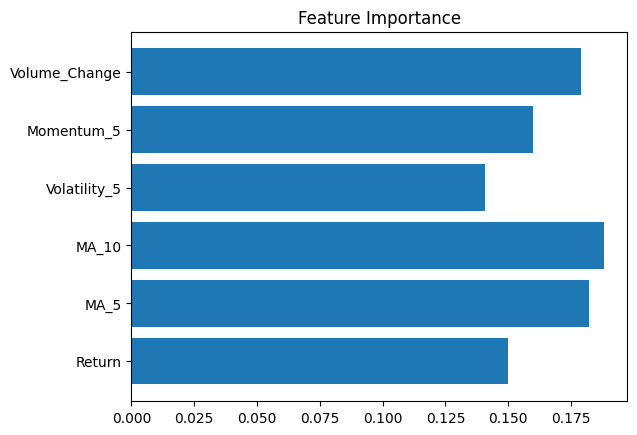

In [37]:
import matplotlib.pyplot as plt

importances = rf.feature_importances_

plt.figure()
plt.barh(features, importances)
plt.title("Feature Importance")
plt.show()